<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/%D0%9C%D0%B0%D1%82%D1%81%D1%82%D0%B0%D1%82_%D1%83%D1%80%D0%BE%D0%BA_7_%D0%94%D0%97_%D0%9A%D0%BE%D0%B6%D0%B5%D0%BC%D1%8F%D0%BA%D0%B8%D0%BD_%D0%92_%D0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройки

In [132]:
import numpy as np
import matplotlib.pyplot as plt



# Задание №1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

##Решение


### Расчет методом линейных квадратов
Предположим, что зависимость скоринга от заработной платы описывается следующей формулой:
$$y = a + bx$$
где:


$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$
$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [133]:

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype= np.float64)

In [134]:
b = (np.mean(y * x) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [135]:
a = np.mean(y) - b*np.mean(x)
a

444.1773573243596

Тогда математическая зависимость скоррига имеет следующи вид
$$y = 444.2 + 2.62 \cdot x$$

In [136]:
# 
y_pred= a + b*x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

### Расчет через матрицы

$$\hat{B} = (X^T \cdot X )^{-1}\cdot X^T\cdot Y$$

In [137]:
ym = y.reshape(10,1)
xm = x.reshape(10,1)
xm = np.hstack([np.ones((10,1)),xm])

In [138]:
xm

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [139]:
#тут считаем с интерцептором
BM_i = np.dot(np.linalg.inv(xm.T@xm),xm.T@ym)
BM_i

array([[444.17735732],
       [  2.62053888]])

Похоже на то, что посчиатали выше, но вот если посчтитать без интерцептора, то получится другая цифра

In [140]:
#А тут посчитаем без интерцепотора
xm_1 = x.reshape(10,1)
BM = np.dot(np.linalg.inv(np.dot(xm_1.T,xm_1)),xm_1.T@ym)
BM

array([[5.88982042]])

In [141]:
#А теперь посчитаем новые y по формулие бех интерцепта
ym_pred = BM*x
ym_pred = ym_pred.reshape(10,)
ym_pred

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

##Ответ
Математическая модель скорринга с интерцептором:
$$y = 444.2 + 2.62 \cdot x$$

Математическая модель скорринга без интерцептора:
$$y = 5.889 \cdot x$$


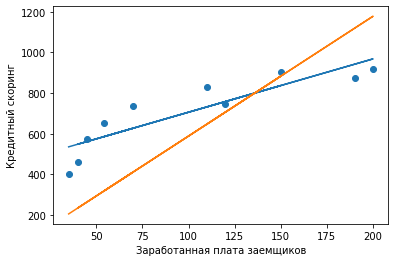

In [142]:
plt.scatter(x, y)
plt.plot(x, y_pred, label = 'DLD')
plt.plot(x, ym_pred)
plt.xlabel('Заработанная плата заемщиков')
plt.ylabel('Кредитный скоринг')

plt.show()

In [143]:
#ошибки
mse_i = ((y - y_pred)**2).sum() / 10
mse = ((y - ym_pred)**2).sum() / 10
A_mean_i = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean = 100 * np.mean(np.abs((y - ym_pred) / y))

print('Ошибка с интерцептором: {}'.format(mse_i) )
print('Ошибка без интерцептором: {}'.format(mse)) 
print('Ошибка апроксимации с интерцептором: {}'.format(A_mean_i)) 
print('Ошибка апроксимации без интерцептора: {}'.format(A_mean)) 

Ошибка с интерцептором: 6470.414201176658
Ошибка без интерцептором: 56516.8584157194
Ошибка апроксимации с интерцептором: 11.46925184356171
Ошибка апроксимации без интерцептора: 33.225451661167305


# Задание № 2 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).



In [144]:
def mse_(B1, y=y, x=x, n=10):
    return np.sum((B1*x-y)**2 / n)

In [145]:
alpha = 1e-6

In [146]:
B1 = 0.1
for i in range(200):
    B1 -=alpha*np.sum((B1*x-y)*x)
    mse = mse_(B1)
    if i%10 == 0:
        print('{}: B1 = {}, mse = {}'.format(i, B1, mse))

0: B1 = 0.8976404, mse = 399855.3735371353
10: B1 = 4.756006774962103, mse = 74227.13760583635
20: B1 = 5.632311000041535, mse = 57430.39993575823
30: B1 = 5.831335410961975, mse = 56563.98122501428
40: B1 = 5.87653742529511, mse = 56519.28913080692
50: B1 = 5.886803613700461, mse = 56516.98379822366
60: B1 = 5.889135249268676, mse = 56516.864883269845
70: B1 = 5.88966480553711, mse = 56516.85874933221
80: B1 = 5.889785077266216, mse = 56516.858432928006
90: B1 = 5.88981239313364, mse = 56516.85841660707
100: B1 = 5.889818597057196, mse = 56516.85841576519
110: B1 = 5.889820006079537, mse = 56516.85841572176
120: B1 = 5.88982032609379, mse = 56516.85841571953
130: B1 = 5.889820398774767, mse = 56516.85841571941
140: B1 = 5.889820415281921, mse = 56516.858415719405
150: B1 = 5.889820419030992, mse = 56516.858415719405
160: B1 = 5.889820419882473, mse = 56516.8584157194
170: B1 = 5.889820420075861, mse = 56516.85841571941
180: B1 = 5.889820420119782, mse = 56516.8584157194
190: B1 = 5.88

In [147]:
B1

5.889820420131917

Видно, что ответ такой же как в задании № 1

## Ответ
$\beta_1 = 5,89$

# Задание №3
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?



## Ответ
При проверке статистических гипотех и для вычисления доверительных интервалов таблица значений Лапласа используется если известо СКО генеральной совокупности.

Если СКО генеральной совокупности не известно, то используется таблица критических точек распределения Стьюдент.

# Задание №4
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение

Попытался сделать по аналогии, судя по всему это был не лучший вариант7

In [148]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype= np.float64)

In [149]:
##Определим среднюю квадратичную ошибкуё
def mse_(B0, B1, y=y, x=x, n=10):
    return np.sum((B0 + B1* x - y) ** 2 / n)

In [150]:
B0 = 0
B1 = 0
alpha = 1e-6

for i in range(600):
    B0 -=alpha*np.sum(B0 + (B1 * x - y) * x)
    B1 -=alpha*np.sum(B0 + (B1 * x - y) * x)
    

    mse = mse_(B0, B1)
    if i%50 == 0:
        print('{}: B0 = {}, B1 = {}, mse = {}'.format(i, round(B0, 4), round(B1, 5), round(mse),5))

0: B0 = 0.8114, B1 = 0.81141, mse = 410801.0
50: B0 = 5.8864, B1 = 5.88633, mse = 55221.0
100: B0 = 5.8894, B1 = 5.88939, mse = 55224.0
150: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
200: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
250: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
300: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
350: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
400: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
450: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
500: B0 = 5.8895, B1 = 5.88939, mse = 55224.0
550: B0 = 5.8895, B1 = 5.88939, mse = 55224.0


In [151]:
y_grad_i = B0 + B1 * x
y_grad_i

array([ 212.01820414,  270.91213337, 1124.87410726, 1183.76803649,
        241.46516875,  418.14695645,  323.91666968,  889.29839032,
        712.61660262,  653.72267339])

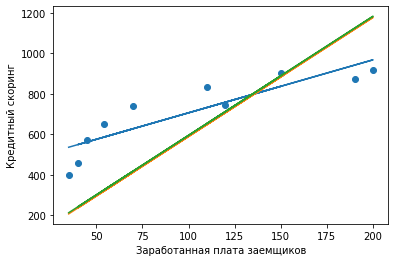

In [152]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.plot(x, ym_pred)
plt.plot(x, y_grad_i)
plt.xlabel('Заработанная плата заемщиков')
plt.ylabel('Кредитный скоринг')

plt.show()

Судя по графику получилось ровно тоже саомое, что и в задаче 2. Скорее всего неправильно сичтал.
Попробую потом, когда пойму как по настоящему устроен этот градиентный спуск.